In [1]:
# Importação das Bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='dark', palette='bright', context='notebook')

# Carregamento dos dados e tratamento de dados
ARQUIVO_DADOS = 'churn_clientes.csv'

df_churn = pd.read_csv(ARQUIVO_DADOS)
df_churn = df_churn.drop(columns='id_cliente', axis=1)
display(df_churn)

# Divisão de variaveis numericas e categoricas
colunas_numericas = df_churn.select_dtypes(include='number').columns
colunas_categoricas = df_churn.select_dtypes(exclude='number').columns
colunas_categoricas = colunas_categoricas.drop('churn')



,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,servico_backup,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,Não,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,Não
2,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,Sim
3,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,Não,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,Não
4,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Masculino,Não,Sim,Sim,24,Sim,Sim,DSL,Sim,Não,Sim,Sim,Sim,Sim,Anual,Sim,Cheque,84.80,1990.50,Não
7039,Feminino,Não,Sim,Sim,72,Sim,Sim,Fibra optica,Não,Sim,Sim,Não,Sim,Sim,Anual,Sim,Cartao de credito,103.20,7362.90,Não
7040,Feminino,Não,Sim,Sim,11,Não,Não,DSL,Sim,Não,Não,Não,Não,Não,Mensal,Sim,Boleto,29.60,346.45,Não
7041,Masculino,Sim,Sim,Não,4,Sim,Sim,Fibra optica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Cheque,74.40,306.60,Sim


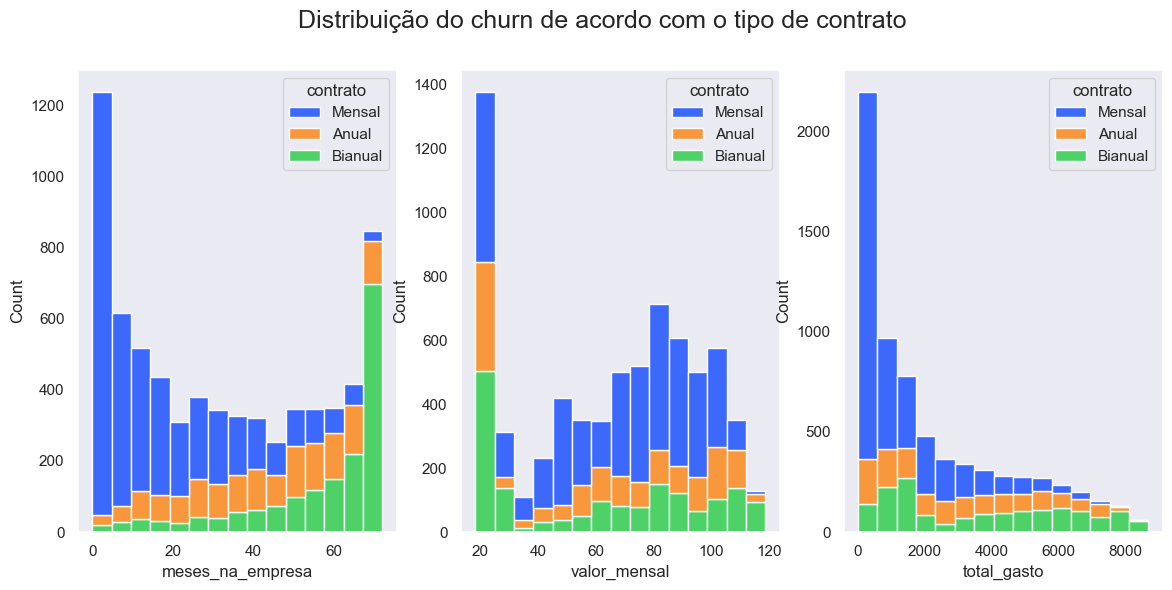

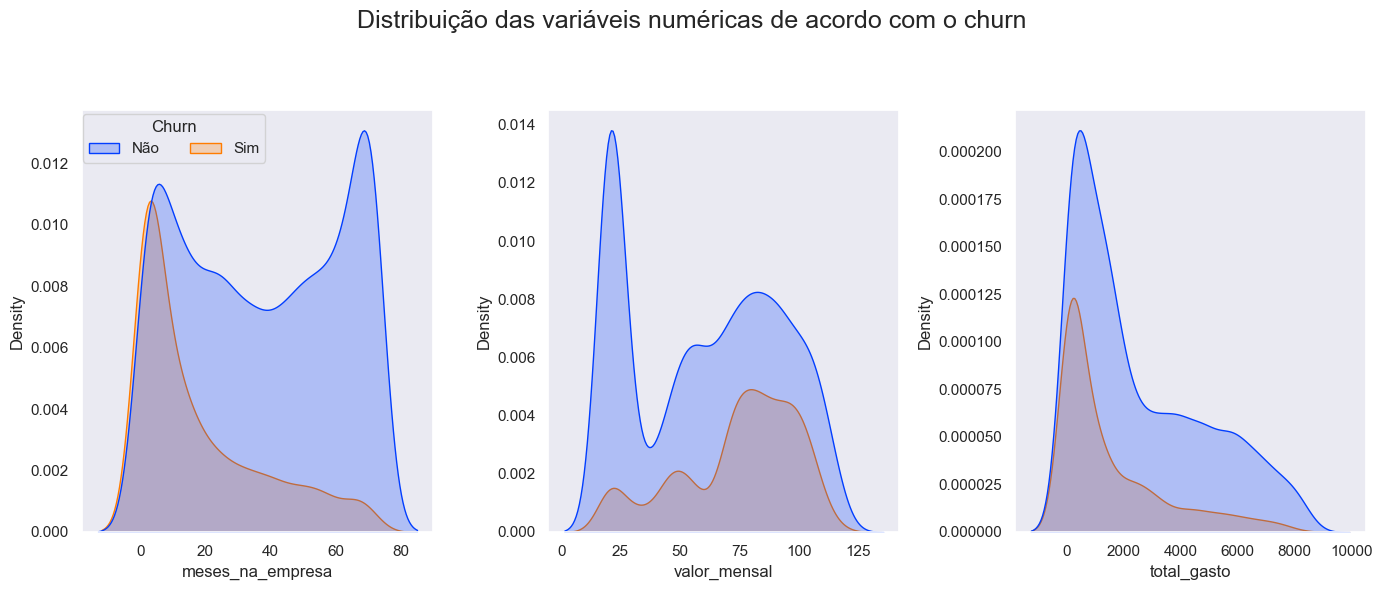

In [3]:
# Análise das Variáveis Numéricas

# Visualização das distribuições das variáveis numéricas com histogramas
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14,6))
fig.suptitle('Distribuição do churn de acordo com o tipo de contrato\n\n', fontsize=18)
for i, coluna in enumerate(colunas_numericas):
    sns.histplot(x=coluna, data=df_churn, hue='contrato', multiple='stack', ax=axs[i], bins=15)
plt.show()


# Gráficos de densidade (KDE) das variáveis numéricas em relação ao churn
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14,6), tight_layout=True)
for i, coluna in enumerate(colunas_numericas):
    sns.kdeplot(x=coluna, data=df_churn, hue='churn', ax=axs[i], fill=True)
    legenda = axs[i].get_legend()
    legenda.remove()

rotulos = [text.get_text() for text in legenda.get_texts()]
fig.legend(handles=legenda.legend_handles, labels=rotulos, loc='upper center', ncols=2, title='Churn', bbox_to_anchor=(0.13,0.82))
fig.suptitle('Distribuição das variáveis numéricas de acordo com o churn\n\n', fontsize=18)
plt.show()


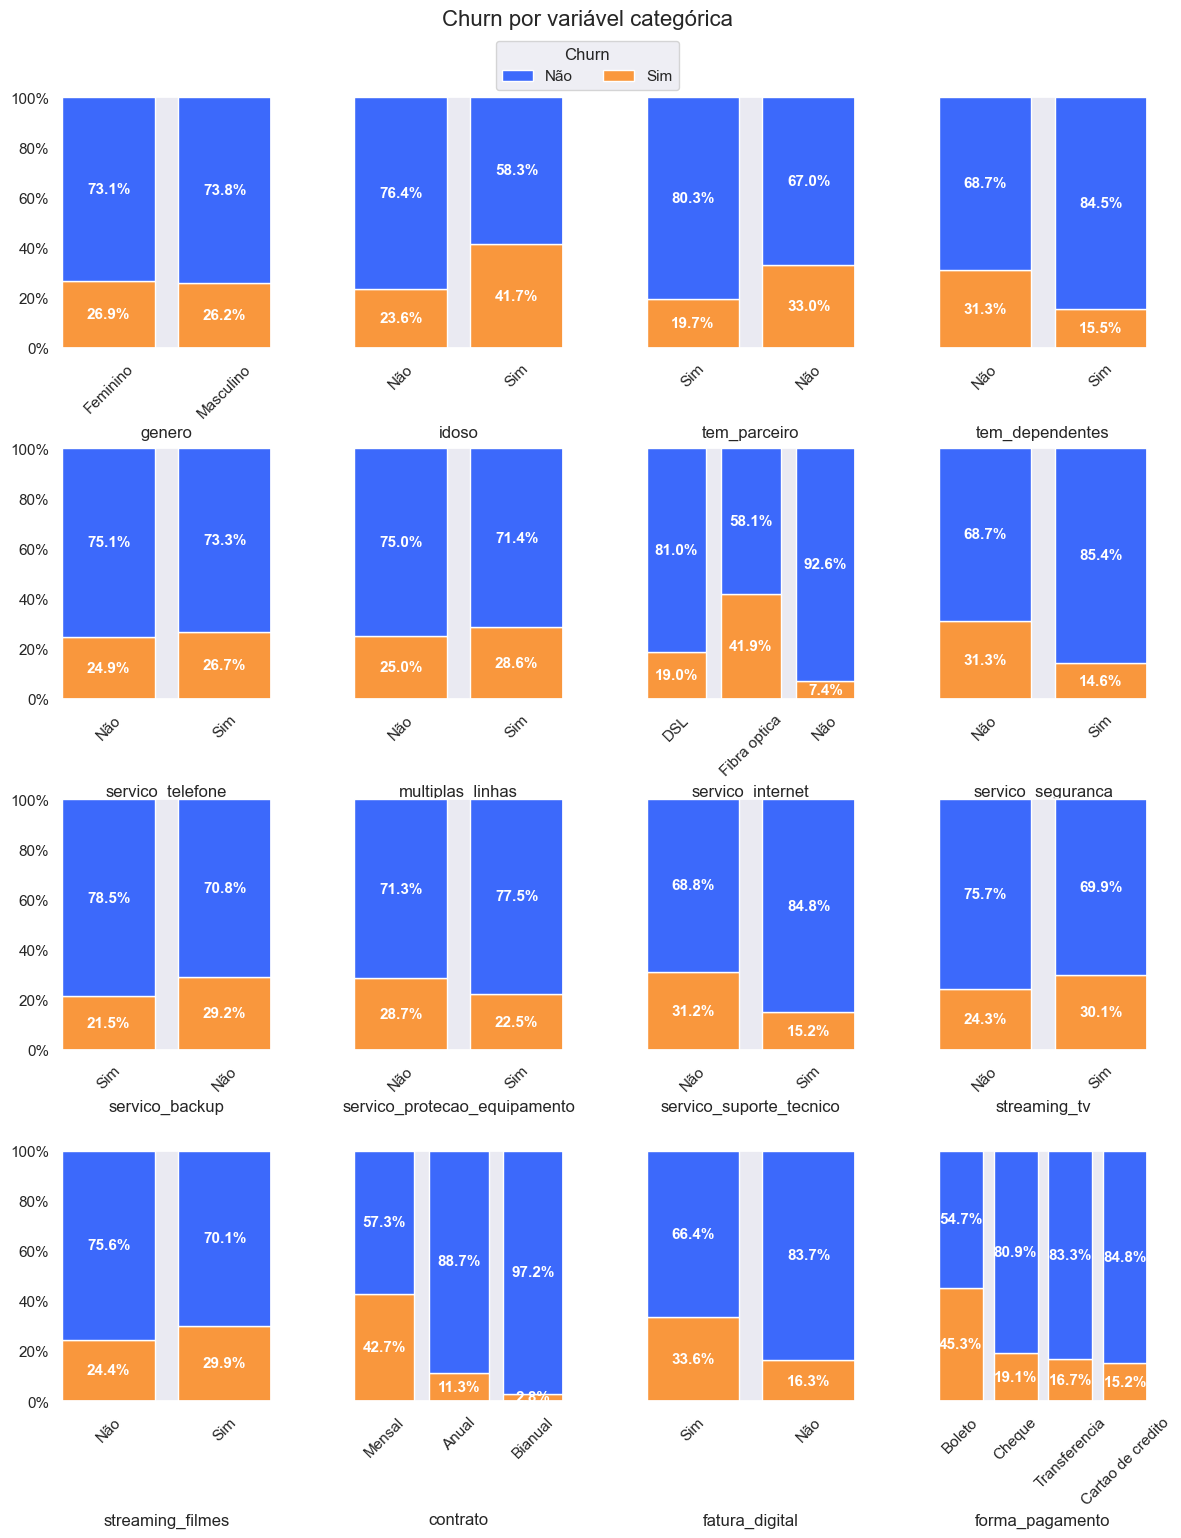

C:\Users\euric\AppData\Local\Temp\ipykernel_42800\4098935232.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_churn['churn'] = df_churn['churn'].replace({'Sim': 1, 'Não': 0})
C:\Users\euric\AppData\Local\Temp\ipykernel_42800\4098935232.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x=churn_c[1:].index, y=churn_c[1:].values, palette='coolwarm', ax=ax)


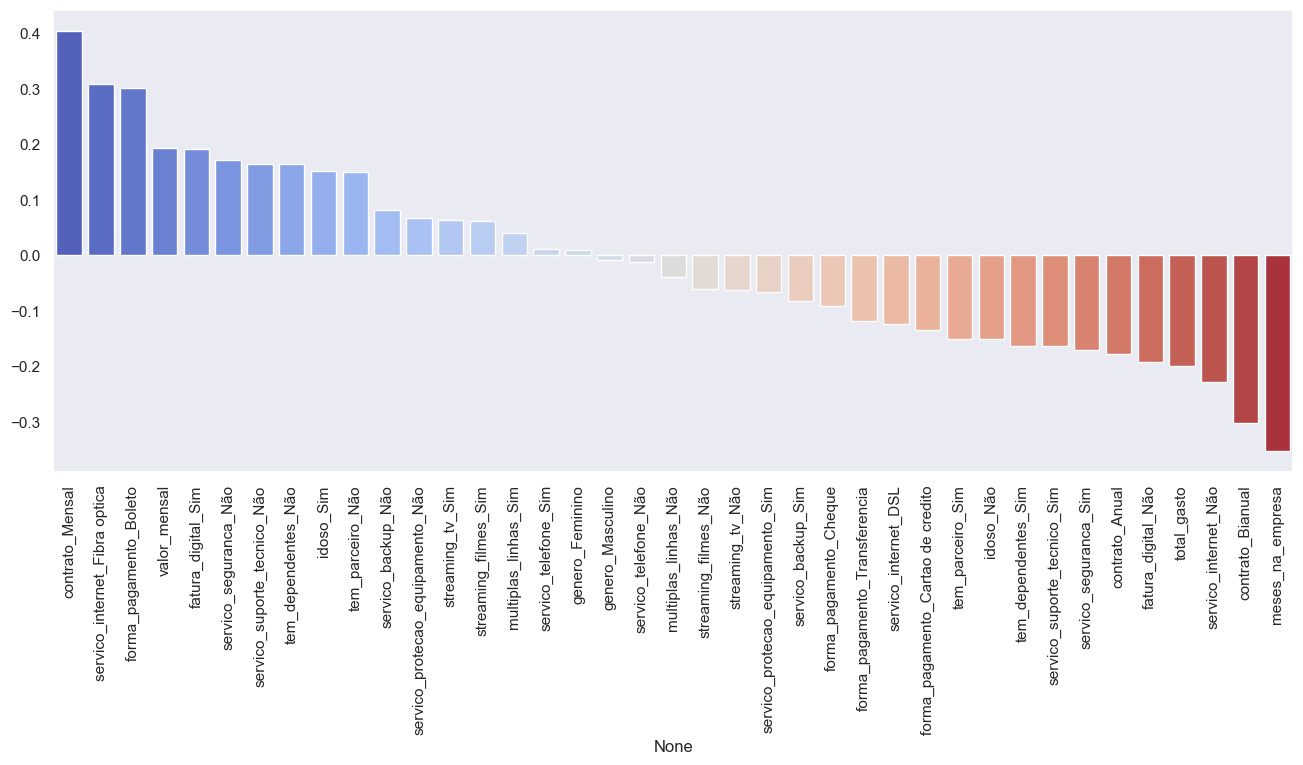

In [5]:
# Análise das Variáveis Categóricas

from matplotlib.ticker import PercentFormatter

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14, 16), sharey=True)

for i, coluna in enumerate(colunas_categoricas):
    h = sns.histplot(x=coluna, hue='churn', data=df_churn, multiple='fill', ax=axs.flat[i], stat='percent',
                     shrink=0.8)
    h.tick_params(axis='x', labelrotation=45)
    h.grid(False)

    h.yaxis.set_major_formatter(PercentFormatter(1))
    h.set_ylabel('')

    for bar in h.containers:
        h.bar_label(bar, label_type='center', labels=[f'{b.get_height():.1%}' for b in bar], color='white', weight='bold', fontsize=11)

    legend = h.get_legend()
    legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=2, title='Churn', bbox_to_anchor=(0.5, 0.965))
fig.suptitle('Churn por variável categórica', fontsize=16)

fig.align_labels()

plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.925)

plt.show()

# Criação de Dummies 

# Gráfico de barras para análise da correlação das variáveis
df_churn['churn'] = df_churn['churn'].replace({'Sim': 1, 'Não': 0})
df_dummies = pd.get_dummies(df_churn)
churn_c = df_dummies.corr()['churn'].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(16,6))
b = sns.barplot(x=churn_c[1:].index, y=churn_c[1:].values, palette='coolwarm', ax=ax)
b.tick_params(axis='x', rotation=90);
plt.show()